In [25]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
#loading the data
online_shopping_path = "../starter_code/online_shopping.csv"

In [5]:
#importing the .csv
shopping_data = pd.read_csv(online_shopping_path)


In [6]:
#previewing the data
shopping_data.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [7]:
# looking at the .info for null values and dtypes
shopping_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [8]:
# getting the column headings to use for analysis
print(shopping_data.columns)

Index(['Unnamed: 0', 'CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Date', 'Offline_Spend',
       'Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')


In [9]:
#dropping the unnamed column
clean_shopping_df = shopping_data.drop('Unnamed: 0', axis=1, inplace=False)
clean_shopping_df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [10]:
#dropping the product SKU column
clean_shopping_df = shopping_data.drop('Product_SKU', axis=1, inplace=False)
clean_shopping_df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [11]:
#dropping remaining null values
clean_shopping_df = clean_shopping_df.dropna(axis=0, how="any")
clean_shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52524 non-null  int64  
 1   CustomerID           52524 non-null  float64
 2   Gender               52524 non-null  object 
 3   Location             52524 non-null  object 
 4   Tenure_Months        52524 non-null  float64
 5   Transaction_ID       52524 non-null  float64
 6   Transaction_Date     52524 non-null  object 
 7   Product_Description  52524 non-null  object 
 8   Product_Category     52524 non-null  object 
 9   Quantity             52524 non-null  float64
 10  Avg_Price            52524 non-null  float64
 11  Delivery_Charges     52524 non-null  float64
 12  Coupon_Status        52524 non-null  object 
 13  GST                  52524 non-null  float64
 14  Date                 52524 non-null  object 
 15  Offline_Spend        52524 non-null  floa

In [12]:
#looking at product counts
clean_shopping_df.Product_Category.value_counts()

Product_Category
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Gift Cards                159
Housewares                122
Android                    43
Name: count, dtype: int64

In [13]:
#coupon status counts
clean_shopping_df.Coupon_Status.value_counts()

Coupon_Status
Clicked     26720
Used        17778
Not Used     8026
Name: count, dtype: int64

In [15]:
clean_shopping_df.Coupon_Code.value_counts()

Coupon_Code
SALE20     6373
SALE30     5915
SALE10     5838
ELEC10     4826
ELEC30     4647
ELEC20     4540
EXTRA10    2317
OFF10      2250
EXTRA20    2211
OFF20      2202
OFF30      2061
EXTRA30    2047
NE30       1003
NE20        740
AIO10       654
AIO20       618
AIO30       610
NE10        455
NJ20        299
NJ10        280
HGEAR10     267
HGEAR20     267
HGEAR30     237
WEMP20      205
WEMP30      185
NJ30        170
WEMP10      164
NCA10       116
NCA30       110
BT10         98
ACC20        97
NCA20        91
GC10         89
BT30         87
BT20         83
ACC30        77
ACC10        60
HOU20        50
HOU10        42
GC20         41
HOU30        30
GC30         29
AND30        16
AND10        14
AND20        13
Name: count, dtype: int64

In [14]:
#gender value counts
clean_shopping_df.Gender.value_counts()

Gender
F    32767
M    19757
Name: count, dtype: int64

In [16]:
#location value counts
clean_shopping_df.Location.value_counts()

Location
Chicago          18240
California       16008
New York         11097
New Jersey        4470
Washington DC     2709
Name: count, dtype: int64

In [43]:
# convert date to month, day, year
clean_shopping_df["Transaction_Date"] = pd.to_datetime(clean_shopping_df["Transaction_Date"])
clean_shopping_df["Transaction_Date"] = clean_shopping_df["Transaction_Date"].dt.strftime("%m-%d-%Y")

clean_shopping_df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,01-01-2019,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,01-01-2019,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,01-01-2019,Nest Cam Outdoor Security Camera - USA,Nest,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,01-01-2019,Nest Protect Smoke + CO White Battery Alarm-USA,Nest,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,01-01-2019,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [44]:
#clean_shopping_df.tail()
clean_shopping_df["Transaction_Date"] = pd.to_datetime(clean_shopping_df["Transaction_Date"])

In [48]:
clean_shopping_df.tail()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
52919,52919,13155.0,F,California,8.0,22504.0,2019-03-10,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,3/10/2019,2500.0,1294.22,3,GC30,30.0
52920,52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,3/28/2019,2000.0,1066.12,3,GC30,30.0
52921,52921,16085.0,M,California,15.0,39991.0,2019-10-06,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0
52922,52922,16085.0,M,California,15.0,39991.0,2019-10-06,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0
52923,52923,13659.0,F,Chicago,8.0,39998.0,2019-10-06,Google Spiral Journal with Pen,Notebooks & Journals,1.0,5.59,6.5,Not Used,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0


In [19]:
#combining new york and new jersy into one group
clean_shopping_df["Location"] = clean_shopping_df.Location.replace({"New York": "New Jersey"})
clean_shopping_df.Location.value_counts().head

<bound method NDFrame.head of Location
Chicago          18240
California       16008
New Jersey       15567
Washington DC     2709
Name: count, dtype: int64>

In [20]:
#combining washington DC and the new jersey group
clean_shopping_df["Location"] = clean_shopping_df.Location.replace({"New Jersey": "Washington DC"})
clean_shopping_df.Location.value_counts().head

<bound method NDFrame.head of Location
Washington DC    18276
Chicago          18240
California       16008
Name: count, dtype: int64>

In [21]:
#renaming the group to northeast
clean_shopping_df["Location"] = clean_shopping_df.Location.replace({"Washington DC": "North East"})
clean_shopping_df.Location.value_counts().head

<bound method NDFrame.head of Location
North East    18276
Chicago       18240
California    16008
Name: count, dtype: int64>

In [22]:
#combining nest canada and nest usa
clean_shopping_df["Product_Category"] = clean_shopping_df.Product_Category.replace({"Nest-Canada": "Nest-USA"})
clean_shopping_df.Product_Category.value_counts().head

<bound method NDFrame.head of Product_Category
Apparel                 18126
Nest-USA                14330
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Bottles                   268
Accessories               234
Gift Cards                159
Housewares                122
Android                    43
Name: count, dtype: int64>

In [23]:
#grouping all the nest categories together
clean_shopping_df["Product_Category"] = clean_shopping_df.Product_Category.replace({"Nest-USA": "Nest"})
clean_shopping_df.Product_Category.value_counts().head

<bound method NDFrame.head of Product_Category
Apparel                 18126
Nest                    16528
Office                   6513
Drinkware                3483
Lifestyle                3092
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Bottles                   268
Accessories               234
Gift Cards                159
Housewares                122
Android                    43
Name: count, dtype: int64>

In [26]:
corrs = clean_shopping_df.corr(numeric_only = True)
corrs

,Unnamed: 0,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
Unnamed: 0,1.000000,-0.033126,-0.014160,0.044865,0.009459,-0.089054,-0.010770,0.042181,-0.210079,-0.101127,0.060389,-0.434369
CustomerID,-0.033126,1.000000,-0.023816,-0.091303,-0.008158,0.004321,-0.005956,-0.000050,-0.004118,-0.017440,-0.090152,0.000337
Tenure_Months,-0.014160,-0.023816,1.000000,0.021634,0.006807,-0.000916,-0.014535,-0.001652,0.040147,0.025451,0.018878,0.029703
Transaction_ID,0.044865,-0.091303,0.021634,1.000000,-0.028466,0.124854,-0.084902,-0.099080,0.200343,0.165640,0.995521,0.241759
Quantity,0.009459,-0.008158,0.006807,-0.028466,1.000000,-0.114066,0.191787,-0.028219,-0.004583,0.010647,-0.027297,-0.011381
Avg_Price,-0.089054,0.004321,-0.000916,0.124854,-0.114066,1.000000,-0.108026,-0.575806,0.094083,0.060772,0.118675,0.027688
Delivery_Charges,-0.010770,-0.005956,-0.014535,-0.084902,0.191787,-0.108026,1.000000,0.029983,-0.013219,-0.019590,-0.085363,-0.018870
GST,0.042181,-0.000050,-0.001652,-0.099080,-0.028219,-0.575806,0.029983,1.000000,-0.073077,-0.046616,-0.094246,-0.012852
Offline_Spend,-0.210079,-0.004118,0.040147,0.200343,-0.004583,0.094083,-0.013219,-0.073077,1.000000,0.336336,0.201543,0.051719
Online_Spend,-0.101127,-0.017440,0.025451,0.165640,0.010647,0.060772,-0.019590,-0.046616,0.336336,1.000000,0.165820,0.024343


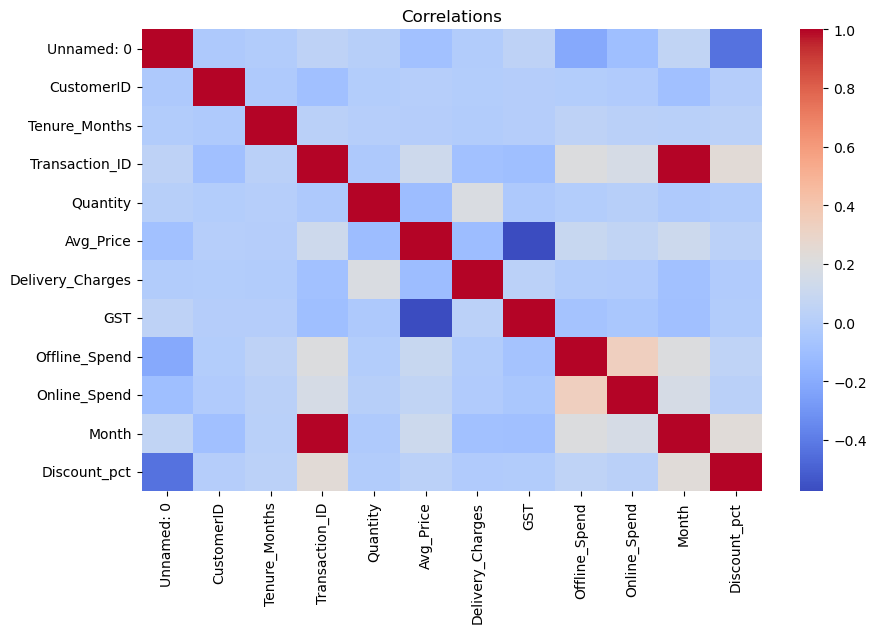

In [27]:
# correlation heatmap for all of the categories
#doesnt seem like there is any correlation for any of these except MAYBE transaciton id and month, this might be an anomolie
plt.figure(figsize=(10,6))

sns.heatmap(corrs, cmap="coolwarm")
plt.title("Correlations")
plt.show()

In [45]:
clean_shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           52524 non-null  int64         
 1   CustomerID           52524 non-null  float64       
 2   Gender               52524 non-null  object        
 3   Location             52524 non-null  object        
 4   Tenure_Months        52524 non-null  float64       
 5   Transaction_ID       52524 non-null  float64       
 6   Transaction_Date     52524 non-null  datetime64[ns]
 7   Product_Description  52524 non-null  object        
 8   Product_Category     52524 non-null  object        
 9   Quantity             52524 non-null  float64       
 10  Avg_Price            52524 non-null  float64       
 11  Delivery_Charges     52524 non-null  float64       
 12  Coupon_Status        52524 non-null  object        
 13  GST                  52524 non-null 

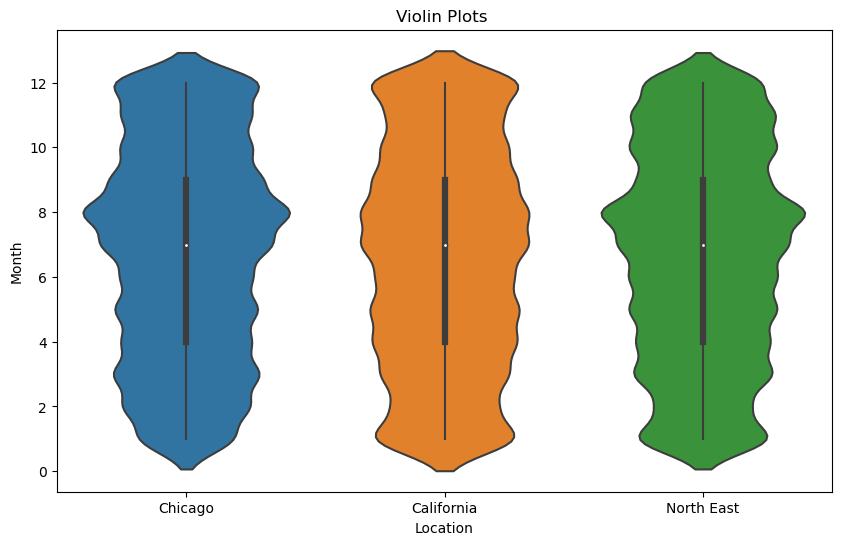

In [47]:
#violin plot test
# distribution
plt.figure(figsize=(10, 6))
sns.violinplot(data=clean_shopping_df, x="Location", y="Month")
plt.title("Violin Plots ")
plt.show()

***Question 1: Is there a difference between men and womens spending habits, ei: do men have fewer transactions but higher cost items vs women many small transactions with smaller transactions?***

In [ ]:
# Voilin plots
# scatter plot regressions

***Question 2: Shipping prices: are people more willing to spend more on delivery if the cost of the item is more?***

In [ ]:
#histogram with a trend line
#scatter plot regression

***Question 3: Does location influence purchase frequency?***

In [ ]:
# map plot 
# histogram with trend line?

***Question 4: How do different discount percentages affect the number of repeat customers compared to other discount levels?***